In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day49-regression-metrics/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
y_pred = lr.predict(X_test)

In [11]:
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE :  0.23150985393278373
MSE :  0.08417638361329656
RMSE :  0.2901316659954521


In [13]:
print("R2 score : ", r2_score(y_test, y_pred))

R2 score :  0.7730984312051673


In [15]:
X_test.shape

(40, 1)

In [14]:
# Adjusted r2 score
r2 = r2_score(y_test, y_pred)
1 - ((1 - r2) * (40 - 1)/(40 - 1- 1))

0.7671273372895138

## **Adding an irrelevant column and checking its effect on R2 and Adjusted R2 score**

In [16]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.159670,3.26
1,5.12,0.700181,1.98
2,7.82,0.100243,3.25
3,7.42,0.368205,3.67
4,6.94,0.930237,3.57


Text(0, 0.5, 'Package(in lpa)')

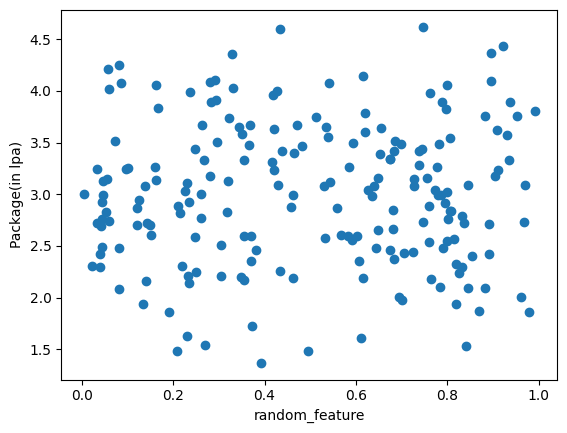

In [17]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

> There is no relationship of this newly added column with the other columns. Its completely random and irrelevant.

In [18]:
 X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7805927581884549


In [24]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7687329072797227

## **Adding a relevant column and checking its effect on R2 and Adjusted R2 score**

In [25]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

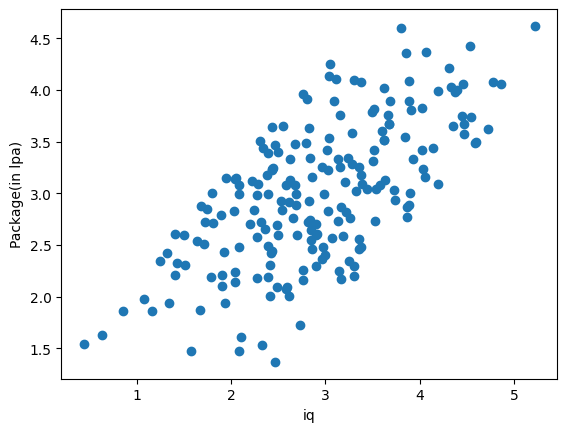

In [26]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [27]:
np.random.randint(-100,100)

-41

In [28]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8688549687537906


In [32]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8617660481458874